## AutoKeras

AutoKeras – это фреймворк машинного обучения на основе Keras. Реализует AutoML для глубокого обучения.

Построен на TensorFlow и Keras.

Используется для классификации изображений, текстов, анализа табличных данных.

При классификации текстов автоматически выполняется предобработка.

tuner - используемый алгоритм подбора/перебора архитектур,

max_trials - параметр для указания максимального количества рассматриваемых архитектур;

max_model_size - максимальное количество весов в модели;

overwrite=True/False - управление перезаписью моделей и результатов обучения.

Тюнер:
1. greedy: начинает с простой модели, постепенно ее усложняет, добавляя новые слои и нейроны в слоях. Процесс повторяется до тех пор, пока не будет достигнуто условие остановки (определенное количество итераций или отсутствие улучшения в процессе обучения).
2. hyperband - это алгоритм для оптимизации гиперпараметров, который использует идею многозадачной оптимизации гиперпараметров с ранней остановкой (гипотеза о том, что перспективную модель видно по первых эпохам). Hyperband оценивает большое количество случайных конфигураций гиперпараметров моделей с различными ресурсами (например, количество эпох обучения или размер подвыборки данных) и останавливает обучение моделей с низким качеством.
3. bayesian: использует информацию о предыдущих оценках гиперпараметров и улучшении результатов, чтобы лучше выбирать гиперпараметры для следующих попыток.
4. random: использует разные гиперпараметры в случайном порядке.
5. task-specific tuner - используется, когда не указан тюнер. В этом случае используются наиболее распространенные и общепринятые модели, которые лучше всего подходят для решаемой задачи.

In [ ]:
!pip install autokeras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 122.7/122.7 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 570.5/570.5 kB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 950.8/950.8 kB 18.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 28.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 92.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 85.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 93.1 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.2.0
    Uninstalling ml-dtypes-

In [ ]:
import autokeras as ak
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, normalize
from sklearn.model_selection import train_test_split
from tensorflow.keras import utils
import matplotlib.pyplot as plt
from PIL import Image
import os

ModuleNotFoundError: No module named 'autokeras'

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving dataset.zip to dataset.zip


In [ ]:
!unzip -q "dataset.zip" -d /content/dataset_pic

In [ ]:
# Папка с папками картинок, рассортированных по категориям
IMAGE_PATH = '/content/dataset_pic/'
# Получение списка папок, находящемуся по адресу в скобках
os.listdir(IMAGE_PATH)

['bulldozer',
 'mining_loader',
 'dump_truck',
 'excavator',
 'truck_crane',
 'car',
 'person',
 'ice_rink']

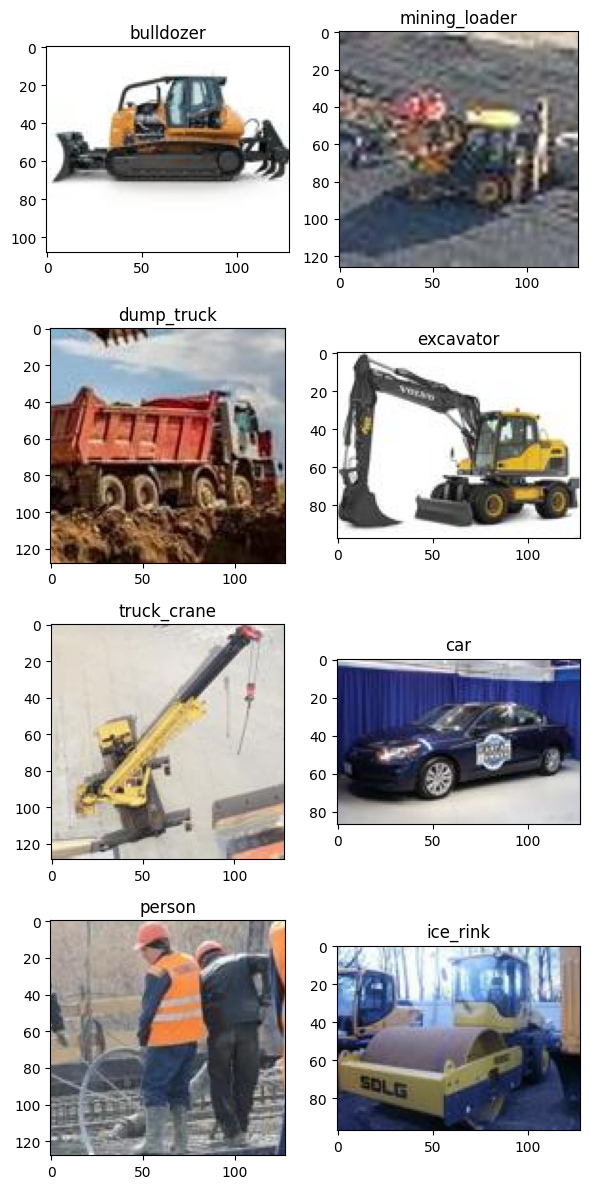

In [ ]:
# просмотр примеров изображений из разных классов
categories = os.listdir(IMAGE_PATH)

plt.figure(figsize=(6,12))

for i, category in enumerate(categories):
  # все имена файлов из папки
  file_names = os.listdir(os.path.join(IMAGE_PATH, category))

  # открываем первое изображение
  img_path = os.path.join(IMAGE_PATH, category, file_names[0])
  img = Image.open(img_path)

  # отображаем содержимое файла
  plt.subplot(4,2,i+1)
  plt.title(category)
  plt.imshow(img)

plt.tight_layout()
plt.show()

In [ ]:
train_data = ak.image_dataset_from_directory(
    IMAGE_PATH,
    image_size = (192,108),
    seed = 111,
    validation_split = 0.2,
    subset = 'training'
)

test_data = ak.image_dataset_from_directory(
    IMAGE_PATH,
    image_size = (192,108),
    seed = 111,
    validation_split = 0.2,
    subset = 'validation'
)

Found 4990 files belonging to 8 classes.
Using 3992 files for training.
Found 4990 files belonging to 8 classes.
Using 998 files for validation.


In [ ]:
clf1 = ak.ImageClassifier(max_trials=5,
                         loss='categorical_crossentropy',
                         metrics=['accuracy'],
                         tuner='greedy',
                         objective='val_accuracy')
clf1.fit(train_data, epochs=1, validation_split=0.2)

Trial 3 Complete [00h 19m 52s]
val_accuracy: 0.1818181872367859

Best val_accuracy So Far: 0.36742424964904785
Total elapsed time: 00h 59m 00s

Search: Running Trial #4

Value             |Best Value So Far |Hyperparameter
False             |False             |image_block_1/normalize
False             |False             |image_block_1/augment
resnet            |resnet            |image_block_1/block_type
False             |False             |image_block_1/res_net_block_1/pretrained
resnet152         |resnet50          |image_block_1/res_net_block_1/version
False             |False             |image_block_1/res_net_block_1/imagenet_size
flatten           |flatten           |classification_head_1/spatial_reduction_1/reduction_type
0                 |0                 |classification_head_1/dropout
adam              |adam              |optimizer
0.001             |0.001             |learning_rate



In [ ]:
best_models = clf1.tuner.get_best_models(num_models=1)
best_models[0].summary()

In [ ]:
#Оценка модели на тестовой выборке
score = clf1.evaluate(test_data)
score[1]

In [ ]:
#Анализ табличных данных
clf_sdf = ak.StructuredDataRegressor(
    overwrite = True,
    max_trials = 5,
    tuner='bayesian',
    objective="val_loss",
    loss = "mean_squared_error",
    metrics = ['mean_squared_error'])
clf_sdf.fit(
    x = x_train,
    y = y_train,
    epochs = 25,
    validation_data = (x_test, y_test))

TypeError: HyperModel.__init__() got an unexpected keyword argument 'overwrite'

In [ ]:
#Классификация текстов
clf_tc = ak.TextClassifier(
    max_trials=2,
    overwrite=True,
    tuner='hyperband',
    max_model_size = 100000
    )
clf_tc.fit(x_train, y_train, batch_size=64, epochs=40, validation_data = (x_val, y_val))

NameError: name 'x_train' is not defined